# Import Libraries

In [1]:
import pandas as pd
from multiprocessing import Pool
import datetime
import json
import concurrent
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


# Reviews Dataset

## Create Dataset

In [2]:
def date_to_timestamp(date):
    return datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').timestamp()

number_of_lines_per_patch = 1000
count = 0
def process_book(reviews: list[dict]):
    result = []
    for review in reviews:
        user_id = review['user_id']
        book_id = review['book_id'] 
        rating = review['rating']
        date_added = review['date_added']
        n_votes = review['n_votes']
        n_comments = review['n_comments']    
        try:
            book_id = int(book_id)
            rating = int(rating)
            n_votes = int(n_votes)
            n_comments = int(n_comments)
            year = int(date_added[-4:])
            date_added = date_to_timestamp(date_added)
            result.append( {
                'book_id':book_id,
                'user_id':user_id,
                'rating': rating,
                'date_added': date_added,
                'year': year,
                'n_votes': n_votes,
                'n_comments': n_comments
            }
        )
        except Exception:
            continue
    return result
        
futures = []
with open('dataset/goodreads_reviews_dedup.json',"r") as jsonfile:
    with concurrent.futures.ThreadPoolExecutor(1000) as executor:
        while True:
            try:
                lines = [json.loads(next(jsonfile)) for _ in range(number_of_lines_per_patch)]
            except Exception:
                break
            if len(lines) == 0:
                break
            
            futures.append(executor.submit(process_book, lines))
            count += 1
            if(count%100 == 0):
                print(count)
        print(count)

all_edges = [v for f in futures for v in f.result()]

interactions = pd.DataFrame(all_edges) 
interactions.to_csv('dataset/reviews.csv')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15739


## Load Dataset

In [62]:
interactions = pd.read_csv("dataset/reviews.csv")
interactions.describe()

Unnamed: 0       book_id        rating    date_added          year  \
count  1.573900e+07  1.573900e+07  1.573900e+07  1.573900e+07  1.573900e+07   
mean   7.869500e+06  1.305795e+07  3.770127e+00  1.394124e+09  2.013695e+03   
std    4.543458e+06  1.034329e+07  1.256282e+00  7.597767e+07  2.424397e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00 -2.770698e+10  1.092000e+03   
25%    3.934750e+06  2.173076e+06  3.000000e+00  1.345568e+09  2.012000e+03   
50%    7.869500e+06  1.281456e+07  4.000000e+00  1.404029e+09  2.014000e+03   
75%    1.180425e+07  2.144848e+07  5.000000e+00  1.455513e+09  2.016000e+03   
max    1.573900e+07  3.652931e+07  5.000000e+00  1.509779e+09  2.017000e+03   

            n_votes    n_comments  
count  1.573900e+07  1.573900e+07  
mean   1.161129e+00  3.056496e-01  
std    9.021618e+00  2.611290e+00  
min   -3.000000e+00 -1.500000e+01  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    1.000000e+00  0.000000e+00  
max    1.669500e+04  1.632000e+03

## Visualize Dataset

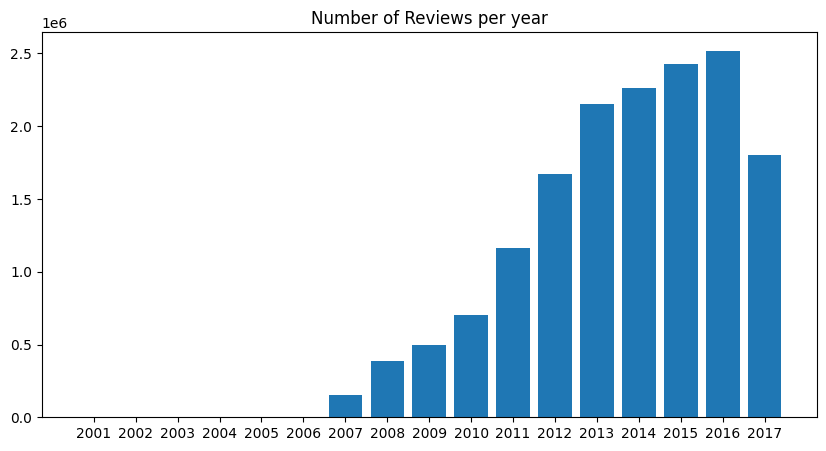

In [5]:
values = [x[0] for x in interactions.groupby('year').count().values][3:]
keys = [str(i) for i in range(2001, 2018)]
# labels = [i for i in range(0,6)]

# y = n
plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.title('Number of Reviews per year')
plt.show()

In [ ]:
latest_review_date = interactions.sort_values('date_added')
latest_review_date

book_id                           user_id  rating    date_added  \
10011516   1087940  046f1c52d5209417573a50f80f270922       3 -2.770698e+10   
1350447      28568  c0909a0e3da1ab177cd00a921014da93       4 -8.442756e+08   
12430046    297671  12707977a55df3ec3deaf86e874fe3ad       5  9.663228e+08   
5312490     196084  d889b42d9eb7b80e02f24830e27c6389       3  9.783360e+08   
5312489      79030  d889b42d9eb7b80e02f24830e27c6389       3  9.792000e+08   
...            ...                               ...     ...           ...   
15688352  34889582  486b5ab2e7acab7207da778ec590f41e       5  1.509769e+09   
15073761  28363991  a3ea89506674fddd4447a294fab10250       4  1.509772e+09   
15456643    410741  973a0aa52b995488aab2ad7ee855eb45       3  1.509773e+09   
15456642     24765  973a0aa52b995488aab2ad7ee855eb45       3  1.509773e+09   
15319136   9641795  fef80f561ccc00f043cc25465fd85299       5  1.509779e+09   

          n_votes  n_comments  
10011516        0           0  
1350447         0           0  
12430046        0           0  
5312490         0           0  
5312489         0           0  
...           ...         ...  
15688352        1           0  
15073761        1           0  
15456643        0           0  
15456642        0           0  
15319136        0           0  

[15739000 rows x 6 columns]

In [29]:
year_2016 = datetime(year=2017, month=1, day=1).timestamp()

In [30]:
last_year = (datetime.fromtimestamp(1.509779e+09) - timedelta(days=365)).timestamp()

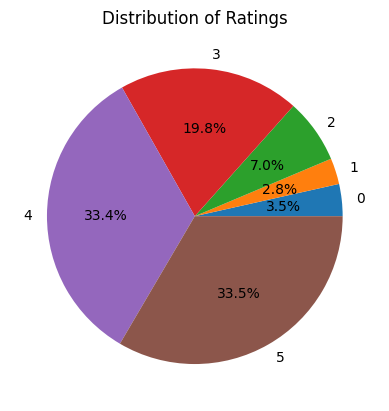

In [10]:
ratings = [x[0] for x in interactions.groupby('rating').count().values]
labels = [i for i in range(0,6)]

ratings


# y = n
plt.pie(ratings, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

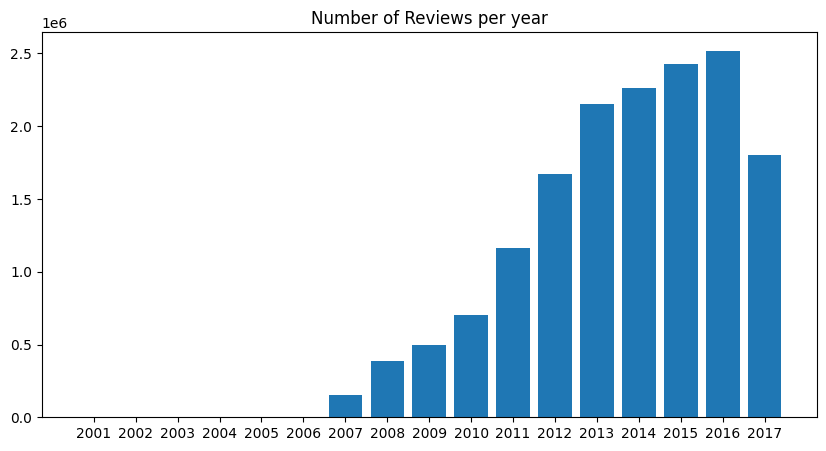

In [3]:
values = [x[0] for x in interactions.groupby('year').count().values][3:]
keys = [str(i) for i in range(2001, 2018)]

plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.title('Number of Reviews per year')
plt.show()

[21811, 10055, 9517, 7940, 7765, 7556, 7054, 5531, 5347, 5345, 5192, 5096, 4991, 4978, 4948, 4842, 4655, 4525, 4468, 4271, 4000, 3848, 3817, 3804, 3776, 3666, 3644, 3573, 3513, 3510, 3488, 3445, 3317, 3310, 3307, 3287, 3280, 3266, 3261, 3223, 3139, 3121, 3049, 2982, 2966, 2951, 2922, 2913, 2904, 2901, 2897, 2894, 2878, 2868, 2867, 2830, 2823, 2817, 2802, 2787, 2771, 2768, 2753, 2745, 2731, 2720, 2710, 2704, 2672, 2669, 2658, 2634, 2631, 2619, 2618, 2612, 2611, 2608, 2605, 2605, 2598, 2582, 2567, 2557, 2532, 2523, 2491, 2491, 2488, 2484, 2469, 2446, 2444, 2442, 2435, 2431, 2417, 2417, 2415, 2412, 2412, 2392, 2380, 2374, 2372, 2370, 2366, 2365, 2364, 2357, 2344, 2332, 2331, 2314, 2314, 2287, 2284, 2281, 2278, 2276, 2260, 2258, 2252, 2242, 2240, 2238, 2226, 2224, 2216, 2204, 2191, 2187, 2176, 2170, 2162, 2161, 2160, 2158, 2155, 2155, 2150, 2140, 2140, 2130, 2122, 2120, 2116, 2109, 2094, 2094, 2093, 2092, 2086, 2081, 2068, 2054, 2047, 2043, 2042, 2035, 2031, 2027, 2023, 2022, 2022, 2016, 2

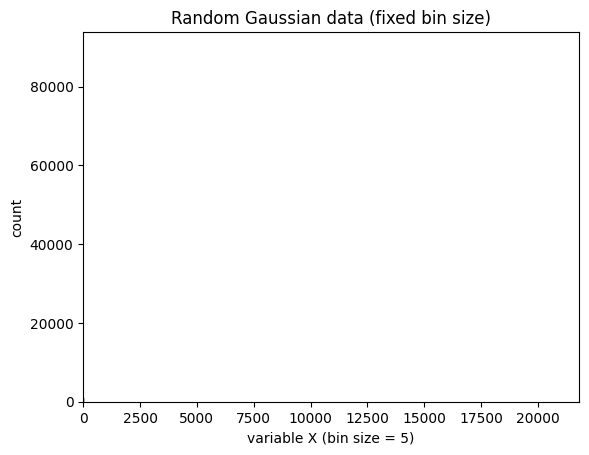

In [4]:
import math

values = sorted((x[0] for x in interactions.groupby('user_id').count().values), reverse=True)
print(values)

bins = np.arange(0, 100, 1)

plt.xlim([min(values)-5, max(values)+5])

plt.hist(values, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

number of users

In [5]:
len(set(list(interactions['user_id'])))

465175

## Filtering Interactions

In [63]:
interactions = interactions.loc[(interactions['rating'] > 3) & (interactions['year'] >= 2007) & (last_year > interactions['date_added'])]
# interactions = interactions.sample(1000000)
interactions

Unnamed: 0   book_id                           user_id  rating  \
0                  0  24375664  8842281e1d1347389f2ab93d60773d4d       5   
1                  1  18245960  8842281e1d1347389f2ab93d60773d4d       5   
3                  3  22078596  8842281e1d1347389f2ab93d60773d4d       4   
4                  4   6644782  8842281e1d1347389f2ab93d60773d4d       4   
6                  6   9460786  8842281e1d1347389f2ab93d60773d4d       4   
...              ...       ...                               ...     ...   
15738994    15738994   7937843  04938d7a33a3fb6b4224fd4e4ee6d119       5   
15738995    15738995  13147091  04938d7a33a3fb6b4224fd4e4ee6d119       4   
15738996    15738996  17333223  6fd7b24d8ed1cdb89b9e52cd6ca9c0e2       4   
15738998    15738998     10614  2c468b4a7c7b836f4dc60a875a536a74       5   
15738999    15738999      7673  2c468b4a7c7b836f4dc60a875a536a74       5   

            date_added  year  n_votes  n_comments  
0         1.503695e+09  2017       16           0  
1         1.501426e+09  2017       28           1  
3         1.500889e+09  2017       22           4  
4         1.500888e+09  2017        8           0  
6         1.488333e+09  2017       13           3  
...                ...   ...      ...         ...  
15738994  1.338699e+09  2012        0           0  
15738995  1.338699e+09  2012        0           0  
15738996  1.387338e+09  2013        0           0  
15738998  1.176315e+09  2007        0           0  
15738999  1.174052e+09  2007        0           0  

[10514171 rows x 8 columns]

### Filter out less reviewed books
Filter out books with less than 3 reviews

In [64]:
book_groups = interactions.groupby('book_id').user_id.count()
print(len(book_groups))
filtered_book_ids = book_groups[book_groups>2].index.tolist()
print(len(filtered_book_ids))
interactions = interactions.loc[interactions['book_id'].isin(filtered_book_ids)]
interactions

1589064
515342


Unnamed: 0   book_id                           user_id  rating  \
0                  0  24375664  8842281e1d1347389f2ab93d60773d4d       5   
1                  1  18245960  8842281e1d1347389f2ab93d60773d4d       5   
3                  3  22078596  8842281e1d1347389f2ab93d60773d4d       4   
7                  7  29983426  8842281e1d1347389f2ab93d60773d4d       5   
8                  8  29893493  8842281e1d1347389f2ab93d60773d4d       5   
...              ...       ...                               ...     ...   
15738994    15738994   7937843  04938d7a33a3fb6b4224fd4e4ee6d119       5   
15738995    15738995  13147091  04938d7a33a3fb6b4224fd4e4ee6d119       4   
15738996    15738996  17333223  6fd7b24d8ed1cdb89b9e52cd6ca9c0e2       4   
15738998    15738998     10614  2c468b4a7c7b836f4dc60a875a536a74       5   
15738999    15738999      7673  2c468b4a7c7b836f4dc60a875a536a74       5   

            date_added  year  n_votes  n_comments  
0         1.503695e+09  2017       16           0  
1         1.501426e+09  2017       28           1  
3         1.500889e+09  2017       22           4  
7         1.483919e+09  2017       26           6  
8         1.481828e+09  2016       29           8  
...                ...   ...      ...         ...  
15738994  1.338699e+09  2012        0           0  
15738995  1.338699e+09  2012        0           0  
15738996  1.387338e+09  2013        0           0  
15738998  1.176315e+09  2007        0           0  
15738999  1.174052e+09  2007        0           0  

[9193735 rows x 8 columns]

### Choose Active Users
choose users that have been active in the last year, so that our analysis become more reliable particularly to evaluate our recommendation system.

In [15]:
last_year

1478243000.0

In [33]:
previous_users = set(G.nodes())
len(previous_users)

4513

In [65]:
import random

tmp = pd.read_csv("dataset/reviews.csv")
tmp = tmp.loc[(tmp['rating'] > 3) & (tmp['year'] >= 2007)]
users_2016 = set(tmp[tmp['date_added'] > last_year]['user_id'])
users_2017 = set(tmp[tmp['date_added'] <= last_year]['user_id'])
del tmp
print(len(users_2016), len(users_2017))
# Users who rated in both years
users_both_years = users_2016.intersection(users_2017)

active_users = list(users_both_years - previous_users)
print(len(active_users))
random.seed(443123)
active_users = random.sample(active_users, 5000)

interactions = interactions.loc[interactions['user_id'].isin(active_users)]
interactions

Unnamed: 0   book_id                           user_id  rating  \
5363            5363   7804180  617ccec66dac2d1029600ed3d706e8ed       5   
5364            5364  18222546  617ccec66dac2d1029600ed3d706e8ed       5   
5365            5365   9615347  617ccec66dac2d1029600ed3d706e8ed       4   
5369            5369  22822858  617ccec66dac2d1029600ed3d706e8ed       4   
5370            5370  25852828  617ccec66dac2d1029600ed3d706e8ed       4   
...              ...       ...                               ...     ...   
15733414    15733414      4954  0a068181fb8d094d132fe98734f4ecb0       5   
15733416    15733416   2429135  0a068181fb8d094d132fe98734f4ecb0       5   
15733419    15733419     54944  0a068181fb8d094d132fe98734f4ecb0       5   
15733420    15733420    209575  0a068181fb8d094d132fe98734f4ecb0       5   
15733421    15733421     61115  0a068181fb8d094d132fe98734f4ecb0       5   

            date_added  year  n_votes  n_comments  
5363      1.497478e+09  2017        0           0  
5364      1.495637e+09  2017        0           0  
5365      1.495154e+09  2017        1           0  
5369      1.485562e+09  2017        2           0  
5370      1.483754e+09  2017        1           0  
...                ...   ...      ...         ...  
15733414  1.346601e+09  2012        0           0  
15733416  1.346524e+09  2012        0           0  
15733419  1.344352e+09  2012        0           0  
15733420  1.344352e+09  2012        0           0  
15733421  1.344352e+09  2012        0           0  

[267103 rows x 8 columns]

In [10]:
dates = interactions.groupby('year')
dates.count()

Unnamed: 0  book_id  user_id  rating  date_added  n_votes  n_comments
year                                                                       
2007        1788     1788     1788    1788        1788     1788        1788
2008        3998     3998     3998    3998        3998     3998        3998
2009        5543     5543     5543    5543        5543     5543        5543
2010        8390     8390     8390    8390        8390     8390        8390
2011       14912    14912    14912   14912       14912    14912       14912
2012       22120    22120    22120   22120       22120    22120       22120
2013       31093    31093    31093   31093       31093    31093       31093
2014       37317    37317    37317   37317       37317    37317       37317
2015       44445    44445    44445   44445       44445    44445       44445
2016       43592    43592    43592   43592       43592    43592       43592

### Remove Books Reviewed by few users
To create a stringly connected network we prevent crreation of completely isolated partitions in users network ignorng books that are liked by less than 3 users

In [66]:
book_groups = interactions.groupby('book_id').user_id.count()
print(len(book_groups))
filtered_book_ids = book_groups[book_groups>2].index.tolist()
print(len(filtered_book_ids))
interactions = interactions.loc[interactions['book_id'].isin(filtered_book_ids)]
interactions

128283
19081


Unnamed: 0   book_id                           user_id  rating  \
5364            5364  18222546  617ccec66dac2d1029600ed3d706e8ed       5   
5365            5365   9615347  617ccec66dac2d1029600ed3d706e8ed       4   
5369            5369  22822858  617ccec66dac2d1029600ed3d706e8ed       4   
5370            5370  25852828  617ccec66dac2d1029600ed3d706e8ed       4   
5375            5375  23899174  617ccec66dac2d1029600ed3d706e8ed       4   
...              ...       ...                               ...     ...   
15727996    15727996   7686667  65c81dbad6d6dfca961d8ddab75e521f       5   
15733409    15733409    270730  0a068181fb8d094d132fe98734f4ecb0       5   
15733411    15733411  16115612  0a068181fb8d094d132fe98734f4ecb0       5   
15733416    15733416   2429135  0a068181fb8d094d132fe98734f4ecb0       5   
15733419    15733419     54944  0a068181fb8d094d132fe98734f4ecb0       5   

            date_added  year  n_votes  n_comments  
5364      1.495637e+09  2017        0           0  
5365      1.495154e+09  2017        1           0  
5369      1.485562e+09  2017        2           0  
5370      1.483754e+09  2017        1           0  
5375      1.467483e+09  2016        0           0  
...                ...   ...      ...         ...  
15727996  1.337090e+09  2012        0           0  
15733409  1.471343e+09  2016        0           0  
15733411  1.406502e+09  2014        0           0  
15733416  1.346524e+09  2012        0           0  
15733419  1.344352e+09  2012        0           0  

[137348 rows x 8 columns]

In [67]:
grouped = interactions.groupby('book_id')
print(grouped.count())

          Unnamed: 0  user_id  rating  date_added  year  n_votes  n_comments
book_id                                                                     
1                 77       77      77          77    77       77          77
2                 83       83      83          83    83       83          83
3                163      163     163         163   163      163         163
5                102      102     102         102   102      102         102
6                 92       92      92          92    92       92          92
...              ...      ...     ...         ...   ...      ...         ...
36177159           3        3       3           3     3        3           3
36187396           3        3       3           3     3        3           3
36252773           5        5       5           5     5        5           5
36266822           3        3       3           3     3        3           3
36289673           3        3       3           3     3        3           3

# Network Construction
Create the graph in which users constitute the nodes. Two users that have rated the same book with 4 or 5 stars are connected through a link.

In [68]:
# %%script false --no-raise-error

import concurrent.futures
import networkx as nx
import time

G = nx.Graph()

def process_group(group_name, group_df):
    print(f"{group_name} started")
    t = time.time()
    edges = []
    ll = group_df['user_id'].tolist()
    for i in range(len(ll) - 1):
        for j in range(i + 1, len(ll)):
            edges.append((ll[i], ll[j]))
    
    elapsed_time = time.time() - t
    print(f"{group_name} with {len(group_df)} took {elapsed_time:.3f} seconds")
    return edges

with concurrent.futures.ThreadPoolExecutor(1000) as executor:
    # Submit each group to the executor
    futures = [executor.submit(process_group, group_name, group_df) for group_name, group_df in grouped]

# Wait for all tasks to complete
concurrent.futures.wait(futures)

all_edges = set(v for f in futures for v in f.result())
print(len(all_edges))
G.add_edges_from(all_edges)


1 started
1 with 77 took 0.000 seconds
2 started
2 with 83 took 0.000 seconds
3 started
3 with 163 took 0.000 seconds
5 started
5 with 102 took 0.000 seconds
6 started
6 with 92 took 0.000 seconds
11 started
11 with 49 took 0.000 seconds
13 started
13 with 3 took 0.000 seconds
21 started
21 with 22 took 0.000 seconds
24 started
24 with 6 took 0.000 seconds
25 started
25 with 3 took 0.000 seconds
26 started
26 with 3 took 0.000 seconds
27 started
27 with 5 took 0.000 seconds
28 started
28 with 3 took 0.000 seconds
29 started
29 with 5 took 0.000 seconds
30 started
30 with 4 took 0.000 seconds
33 started
33 with 27 took 0.000 seconds
34 started
34 with 28 took 0.000 seconds
50 started
50 with 8 took 0.000 seconds
67 started
67 with 8 took 0.000 seconds
93 started
93 with 8 took 0.000 seconds
106 started
106 with 4 took 0.000 seconds
122 started
122 with 5 took 0.000 seconds
151 started
151 with 3 took 0.000 seconds
152 started
152 with 12 took 0.000 seconds
153 started
153 with 3 took 0.

In [75]:
print(G.number_of_edges())
print(G.number_of_nodes())
print((G.number_of_edges()*2)/G.number_of_nodes())
print(G.number_of_nodes() * (G.number_of_nodes()-1) /2)

973071
4746
410.0594184576485
11259885.0


In [76]:
nx.write_edgelist(G, 'dataset/users_2017_test.edgelist.gz')

## Visualize Network Properties

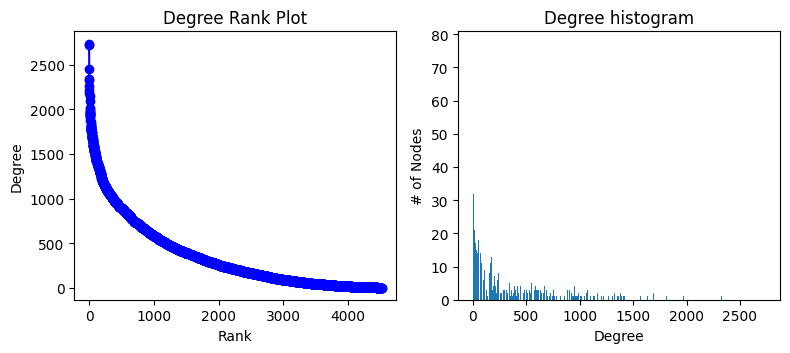

In [39]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

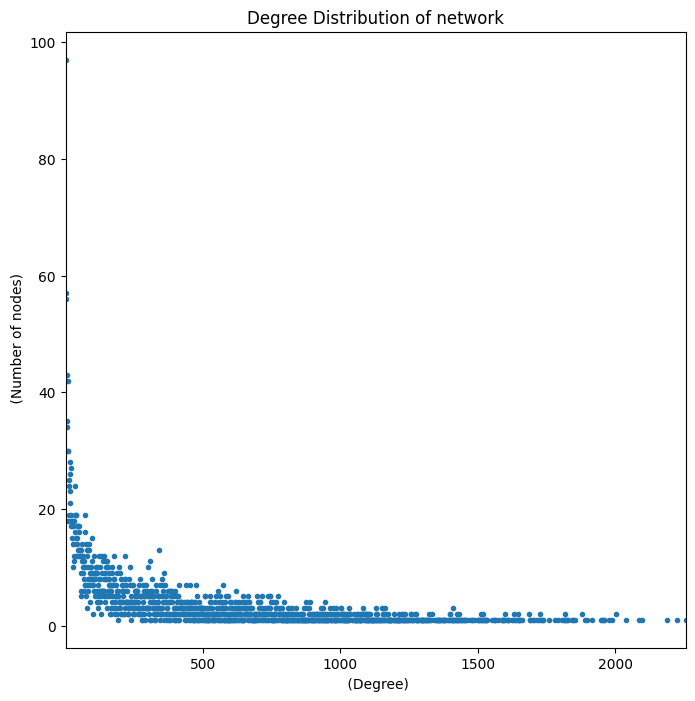

In [16]:
import numpy as np
import matplotlib.pyplot as plt


out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


new_links = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

plt.figure(figsize=(8,8))
plt.xlim(min(new_links), max(new_links))
plt.xlabel(' (Degree)')
plt.ylabel(' (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(new_links, y, '.')

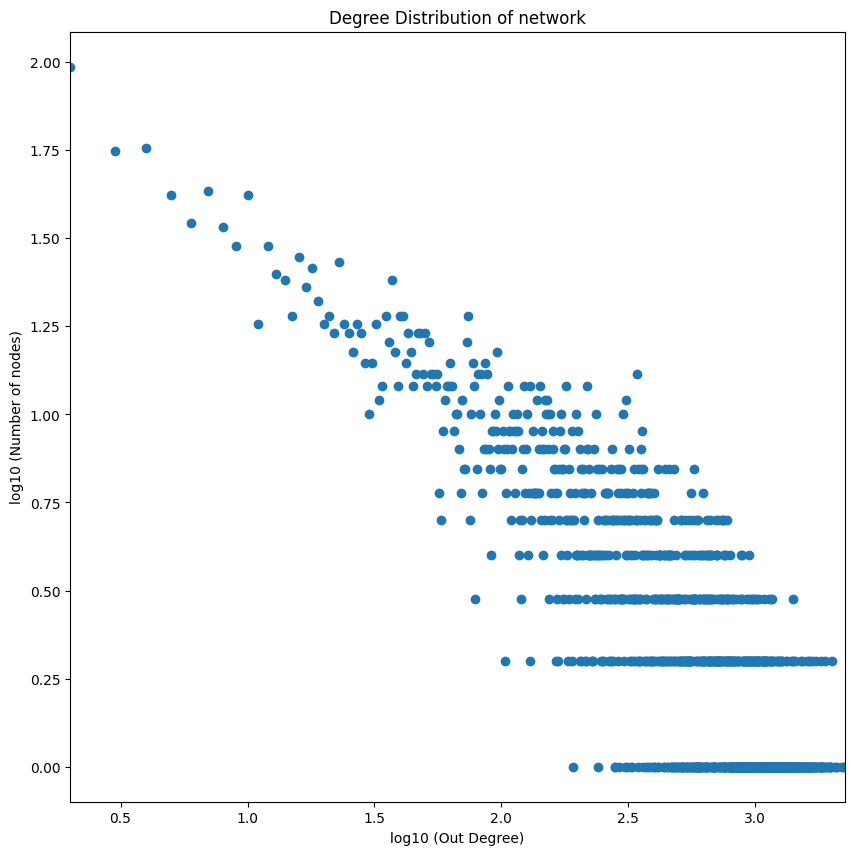

In [17]:
## degree Distribution
import numpy as np
out_degrees = dict(G.degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]


new_links = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(new_links)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

## Load Networks

In [102]:
G = nx.read_edgelist('dataset/users.edgelist.gz')
G_2017 = nx.read_edgelist('dataset/users_2017.edgelist.gz')
print(G)
print(G_2017)

Graph with 4513 nodes and 796460 edges
Graph with 4725 nodes and 960033 edges


In [103]:
G_test = nx.read_edgelist('dataset/users_test.edgelist.gz')
G_2017_test = nx.read_edgelist('dataset/users_2017_test.edgelist.gz')
print(G_test)
print(G_2017_test)

Graph with 4517 nodes and 798091 edges
Graph with 4746 nodes and 973071 edges


## Components

In [74]:
connected_components = list(nx.connected_components(G))
print(len(connected_components))

1


## Communities

### find the best seed for louvain_communities

In [42]:
from networkx.algorithms.community import louvain_communities, modularity

scores = {}
for i in range(0, 10000):
    seed  = random.randint(0,99999999)
    c = louvain_communities(G, seed=seed, threshold=0)
    new_links = modularity(G, c, weight = None)
    scores[seed] = new_links
    print('seed:', seed, 'modularity:', new_links, '#:', len(c))

seed: 18166725 modularity: 0.18733811725249178 #: 7
seed: 93316696 modularity: 0.1878071171990059 #: 7
seed: 56737255 modularity: 0.18468900946619599 #: 5


KeyboardInterrupt: 

In [79]:
# best_seed = sorted(scores.items(), key=lambda item: item[1], reverse=True)[2][0]
best_seed = 29636458
best_seed

29636458

In [83]:
from networkx.algorithms.community import louvain_communities, modularity
communities = louvain_communities(G, seed=best_seed, threshold=0)
len(communities)

6

In [7]:
# communities = [c for c in communities if len(c)>10]
for c in communities:
    if len(c)<10:
        print('removed')
        for n in c:
            G.remove_node(n)
        communities.remove(c)

In [84]:
for c in communities:
    print(len(c))

1373
1042
287
123
1128
564


### Modularity
the number of edges within groups exceeds the expected number. however, it is less than 0.3, so it does not mean significant community structure

In [85]:
modularity(G, communities, weight = None)

0.18782515180710557

### Assign communities

In [86]:
for comm_id, comm_nodes in enumerate(communities):
    for node in comm_nodes:
        G.nodes[node]["community"] = comm_id

### Plot Communities

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 3: Create a color map for the communities
colors = []

# Create a mapping of node to color
node_color = {}

for i, comm in enumerate(communities):
    for node in comm:
        node_color[node] = i
# for color, node in zip(colors, G.nodes()):
#     node_color[node] = color

# # Step 4: Draw the graph with community colors
# plt.figure(figsize=(10, 7))
# nx.draw_networkx(G, node_color=[node_color[node] for node in G.nodes()], with_labels=False, node_size=100, cmap=plt.cm.jet)
# plt.show()

In [28]:
node_colors = [node_color[node] for node in G.nodes()]
set(node_colors)

{0, 1, 2, 3, 4, 5, 6}

In [29]:
import math

# pos = nx.spring_layout(G, seed=42)  # Increase node separation
pos = {}
angle = math.pi * 2 / len(communities)

for comm_id, comm_nodes in enumerate(communities):
    for node in comm_nodes:
        pos[node] = (math.cos(comm_id * angle) + random.random()/2.0 - 0.25, math.sin(comm_id * angle) + random.random()/2.0 - 0.25)
nx.set_edge_attributes(G, name="concentrate", values=True)  # Enable edge concentration

In [30]:
edge_colors = []
num_intera_cluster, num_within_cluster = 0, 0
for edge in list(G.edges()):
    i = [i for i, comm in enumerate(communities) if edge[0] in comm]
    j = [i for i, comm in enumerate(communities) if edge[1] in comm]
    if i==j:
        num_within_cluster += 1
    else:
        num_intera_cluster += 1
    edge_colors.append('#000000' if i==j else '#ff0000')
print(num_intera_cluster, num_within_cluster)

397434 308428


In [ ]:
# pos = {}
# for comm_id, comm_nodes in enumerate(communities):
#     for node in comm_nodes:
#         pos[node] = (comm_id + random.random()/2.0 - 0.25, random.random())
# nx.set_edge_attributes(G, name="concentrate", values=True)  # Enable edge concentration

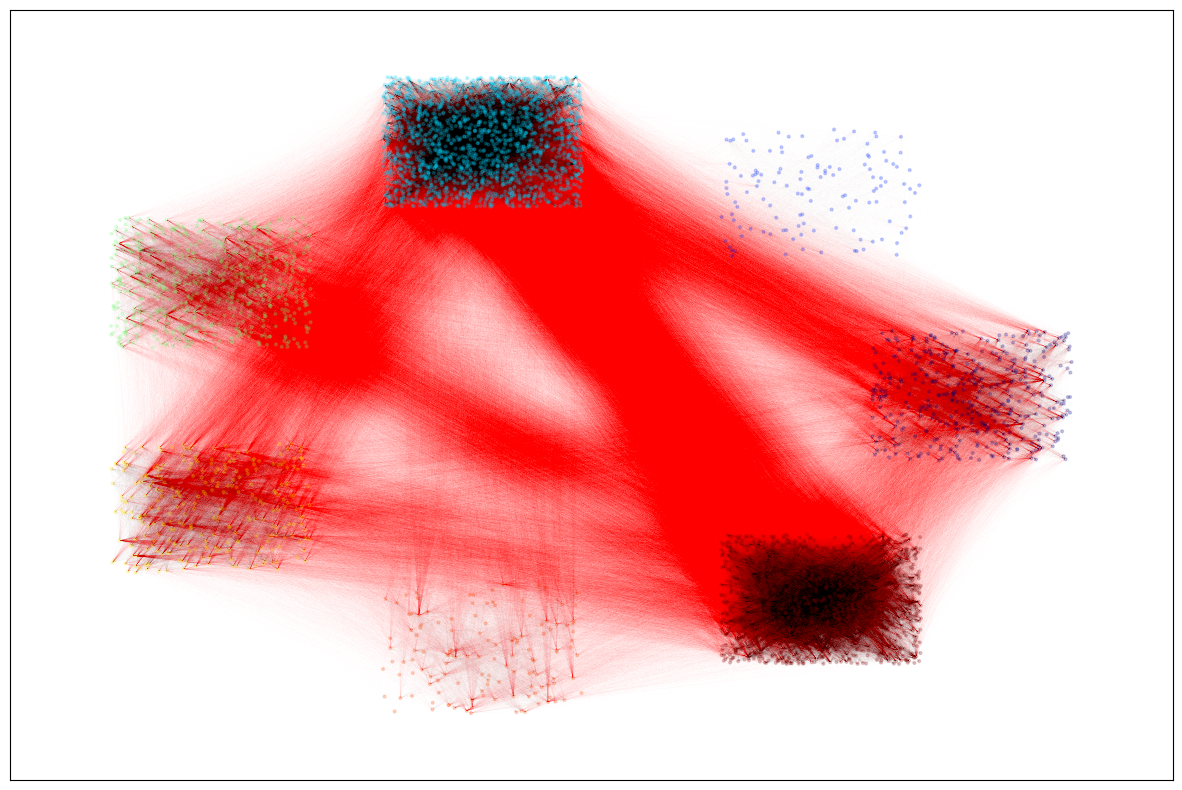

In [31]:

plt.figure(figsize=(15, 10))
nx.draw_networkx(
    G,
    pos=pos,
    nodelist=node_color.keys(),
    node_color=list(node_color.values()),
    with_labels=False,
    node_size=4,
    cmap=plt.cm.jet,
    font_size=8,
    font_color="white",
    width = 0.006,
    alpha = 0.2,
    edge_color=edge_colors
)
plt.show()

## Diameter of the Network

In [ ]:
nx.shortest_path_length(G, source=list(G.nodes())[1000])

In [129]:
from  concurrent.futures import ThreadPoolExecutor, as_completed
import networkx as nx
from tqdm import tqdm

def compute_shortest_path(node):
    sps = nx.shortest_path_length(G, source=node)
    del sps[node]
    # print(node, 'done.')
    return (node, sps)

# pbar = tqdm(total=G.number_of_nodes())  # Init pbar

with ThreadPoolExecutor() as executor:
    # Submit each group to the executor
    futures = executor.map(compute_shortest_path, G.nodes())
    print('Jobs created.')
    results = list(tqdm(futures, total=G.number_of_nodes()))

print('here2')
shortest_paths = dict(r for r in results)
print('here3')
print(len(shortest_paths))

Jobs created.


100%|██████████| 4513/4513 [06:12<00:00, 12.12it/s]  

here2
here3
4513


Network Diameter

In [130]:
diameter = 0
sum = 0
count = 0
for targets in shortest_paths.values():
    for length in targets.values():
        sum += length
        count += 1
        if length > diameter:
            diameter = length
print('average path lenght:', sum/count)
print('Diameter:', diameter)

average path lenght: 2.1636649953719203
Diameter: 5


In [ ]:
# p = dict(nx.shortest_path_length(G))
# p

In [ ]:
# diameter = nx.diameter(G)

## Clustering Coefficient

In [131]:
clustering = nx.clustering(G)
clustering

{'613b47964dbacb8f76fde8e4c27a1c06': 0.3325051317139925,
 'd950574a6b2d8ef14020c6d9dab8de6c': 0.7377690802348337,
 'e74e65874672e661b46da192e9068e14': 0.41360046308706583,
 'b7c6920799368c034366ade3f737c9e8': 0.28981622800574647,
 '4cf7f99440281f9ea0ea7398a54cd227': 0.3979237770193402,
 'bb1e86378939c95dc9209a963b6cb086': 0.5024827024827024,
 'dfb5b62fbd924d96758f24323527845e': 0.28247985658783675,
 '987399330fee388513075c10b982dd11': 0.3676409722921351,
 '1b34ccce812160cfa34692bc53489823': 0.6108035313481969,
 'e95eaa36654073c1c7353e3838253d40': 1.0,
 '6b0eb239abb8cf64ab5d5580cdb5c38c': 0.2742480740247029,
 'dceb4807abd7b25483354deaf817abe2': 0.229761587425821,
 '6a18d2ae3a1beaab37b869dc3a5aa5a9': 0.32738999832271903,
 '2c24a24ea42326f2071a34fd69b35135': 0.372992299229923,
 '38e202aa76a8884f9da871e21a41fbf3': 0.28424193014687943,
 '2c55a3bbbda3fe410cd0a9d30008d615': 0.6964569011105235,
 '6cb0f457e2e823642bb467fb77624e87': 0.576598159122431,
 '630f1c10f4e76be80e44500189d28ad0': 0.30437

In [132]:
sum = 0
count = 0
for cc in clustering.values():
    sum += cc
    count += 1
print('average Clustering Coefficient:', sum/count)

average Clustering Coefficient: 0.635725616706285


## Power Law

In [107]:
G.degree()

DegreeView({'10545055a446a513b56df60013976283': 1075, '1b195ea4db9c35ddce192a92de0dac1a': 1202, '78e3e18447a4adba95f7d20760d74d5f': 1082, '813957808d9bfe72bbc653ceb012a821': 282, '3bfec68bc1176ca9a81c2fbd69cafedb': 1072, 'cf2d20d9904a3b93fe8e32763483153f': 1309, 'e021b024b020b226471d33612bcc7f74': 312, 'efe474053a6016351885ebd3a038982d': 365, '75f4a47456099ade341023540e135eab': 264, '637e14c1407eac8e17fb51cfb6109bc3': 38, '771ff98572cd99ab4a6cf3ff81989615': 1353, 'e7ebf9fd8e9dabdb63f592488db38287': 753, 'dca22ada5bbe0aa926614eff644315d8': 856, '1cd55882a518421226bd495e7aa34e2a': 26, '49c9fbda27c2694b9ce1203e490499ff': 1855, 'de5cb7006ec99cdb1e1db1d411855966': 885, '60f9a8618cb784de18ea38901374c58b': 1792, '498a67ded36448a8972cfb0a6b4cc7a4': 250, '87f18aceb6eb551b1e5f72b1a67c13ac': 393, '469a125c5c74ecb5c2d9223a20bdb0f6': 1178, '0ee18750485fb85da47e334a6bfac655': 1230, 'cc50e6814eca19d5fd87dbeb910dfbdd': 481, '5110ad384f9fa4d1a2f557750676d777': 837, '1370ed340c7f4c5ff94a126691c9234e': 6

In [75]:
max_degree = max(list(dict(G.degree()).values()))
max_degree


2360

In [76]:
P_K = [0] * (max_degree+1)
for degree in list(dict(G.degree()).values()):
    P_K[degree] += 1 / G.number_of_nodes()
P_K

[0,
 0,
 0.028584090405495154,
 0.016618657212497234,
 0.016175493020163977,
 0.011079104808331493,
 0.010857522712164863,
 0.006204298692665635,
 0.008198537558165304,
 0.008198537558165304,
 0.009306448038998454,
 0.007976955461998675,
 0.008420119654331934,
 0.006425880788832265,
 0.004874806115665856,
 0.008420119654331934,
 0.0059827165964990055,
 0.005761134500332376,
 0.008198537558165304,
 0.005096388211832486,
 0.005317970307999116,
 0.003988477730999336,
 0.006869044981165525,
 0.0059827165964990055,
 0.005317970307999116,
 0.005096388211832486,
 0.003988477730999336,
 0.004431641923332596,
 0.005096388211832486,
 0.004210059827165966,
 0.0037668956348327065,
 0.004653224019499226,
 0.003988477730999336,
 0.004210059827165966,
 0.0035453135386660766,
 0.002658985153999557,
 0.002437403057832927,
 0.004874806115665856,
 0.0033237314424994467,
 0.002437403057832927,
 0.003102149346332817,
 0.003102149346332817,
 0.0022158209616662972,
 0.0033237314424994467,
 0.0017726567693330

C:\Users\rezaab\AppData\Local\Temp\ipykernel_1900\2520684258.py:21: RuntimeWarning: divide by zero encountered in log10
  mylogy = np.log10(P_K)


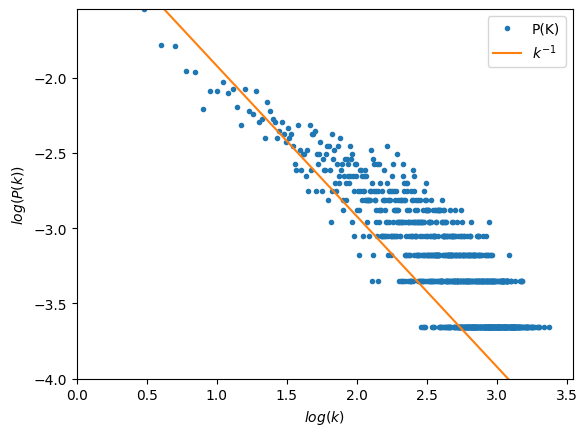

In [89]:
from math import log10
import numpy as np
import matplotlib.pyplot as plt

new_links = np.linspace(1, max_degree, 1000)
y = 0.12 * np.power(new_links, -1)

logx = np.log10(new_links)
logy = np.log10(y)

x2 = np.linspace(1, max_degree, 1000)
y2 = np.power(new_links, -2.5)

logx2 = np.log10(x2)
logy2 = np.log10(y2)


myx = np.linspace(1, max_degree, max_degree+1)

mylogx = np.log10(myx)
mylogy = np.log10(P_K)



plt.figure()
plt.plot(mylogx, mylogy, '.', label='P(K)')
plt.plot(logx, logy, label='$k^{-1}$')
# plt.plot(logx2, logy2)
plt.xlabel("$log(k)$")
plt.ylabel("$log(P(k))$")
plt.ylim(-4, max(mylogy))
plt.xlim(0)
# plt.title("Power-law Distribution")

plt.legend()
plt.show()


# Node Analysis

### Node Importance

#### HITS

In [133]:
(hubs,authorities) = nx.hits(G)

In [134]:
dict(sorted(hubs.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0013287563223899727,
 'bf2abe9a707f9581f8d32196958b6e05': 0.001256559334746987,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.0012441301121966224,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0012293676164307678,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.001222836795813433,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0011971187217868719,
 '890fe00be33e1e5dc34a076343cfa15a': 0.001187979444993648,
 'fa56c37387610a09380020f3a57d4629': 0.001185503262727406,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011602841253297508,
 '69d6de82682308ae18acf638799094f5': 0.0011532955265262566,
 'dceb4807abd7b25483354deaf817abe2': 0.0011492920521197136,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0011417228859511108,
 '307a9162351905aa4a88488ccc1bef37': 0.0011296976592635563,
 '1f07a083b9765d480e5fc06a63e6f129': 0.001122167928005283,
 '9b807c0a39521f5c3ab0a3bc0e5f8851': 0.0011204588339191086,
 '8ec35dc892073f19e6583879f7206342': 0.0011148925537950675,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.001112

In [135]:
dict(sorted(authorities.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0013287563223899769,
 'bf2abe9a707f9581f8d32196958b6e05': 0.0012565593347469894,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.0012441301121966237,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0012293676164307668,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.001222836795813435,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0011971187217868727,
 '890fe00be33e1e5dc34a076343cfa15a': 0.0011879794449936463,
 'fa56c37387610a09380020f3a57d4629': 0.001185503262727407,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011602841253297502,
 '69d6de82682308ae18acf638799094f5': 0.001153295526526259,
 'dceb4807abd7b25483354deaf817abe2': 0.001149292052119714,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0011417228859511117,
 '307a9162351905aa4a88488ccc1bef37': 0.001129697659263558,
 '1f07a083b9765d480e5fc06a63e6f129': 0.0011221679280052838,
 '9b807c0a39521f5c3ab0a3bc0e5f8851': 0.001120458833919109,
 '8ec35dc892073f19e6583879f7206342': 0.0011148925537950662,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.0011127

#### Page Rank

In [136]:
pr = nx.pagerank(G)

In [137]:
dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))

{'818a07d4b1a085d65a3851c9f68f148d': 0.0017953714729810272,
 'fc42cbb17f863f27ab7b8b231ef6e49a': 0.0017107059402961522,
 '2a0bca8d74bf6811e6c44df3f8ea0761': 0.0014958863898261743,
 'bf2abe9a707f9581f8d32196958b6e05': 0.0014081002555232335,
 'cfe4738a5d926fc158d4fcb1287fe2c5': 0.0013828929212075089,
 '31af83257723e6cd61e4b09371ea9cf1': 0.0013519304780141405,
 '16bcc03cb29d0950f52a897ceaf8eb6e': 0.0013457673578387258,
 '7d310f25dd8e24af00e7ef6857c19a7b': 0.0013205384785736252,
 '4bd30b70ee73e1caf2cb0753e4b6504f': 0.001310541802759259,
 '69d6de82682308ae18acf638799094f5': 0.0012754810503393704,
 'dceb4807abd7b25483354deaf817abe2': 0.001267239067123674,
 '890fe00be33e1e5dc34a076343cfa15a': 0.0012655268182206849,
 'bded0233fcc6f1bdd59726f24c7f3688': 0.0012388495553795529,
 'fa56c37387610a09380020f3a57d4629': 0.0011999537464929674,
 '04bbadd525a062622b18b7d42edd8619': 0.0011915866585822529,
 'cf8c1773ea4ff67cf2eca21761fd8345': 0.0011768762858449268,
 '00b5b129cc3cfa6511418cce1cec54ab': 0.001

In [138]:
G.degree(['818a07d4b1a085d65a3851c9f68f148d', '7ddb7cd66031a983e696cd0627d80a21'])

DegreeView({'818a07d4b1a085d65a3851c9f68f148d': 2360})

# Link Analysis

## Link Prediction

In [20]:
def compute_accuracy(preds, n = 10000):
    preds = sorted(preds, reverse=True, key=lambda item: item[2])
    count = 0
    c = 0
    for pred in preds[:n]:
        c+=1
        if G_2017.has_edge(pred[0], pred[1]):
            count += 1
    print(count, c)
    return count

# def compute_accuracy(preds, n = 5):
#     preds = sorted(preds, reverse=True, key=lambda item: item[2])
#     count = 0
#     c = 0

#     for node in G.nodes():
#         node_preds = []
#         for p in preds:
#             if p[0] == node or p[1] == node:
#                 node_preds.append(p)
#                 if len(node_preds) >= n:
#                     break
                
#         for pred in node_preds[:n]:
#             c+=1
#             if G_2017.has_edge(pred[0], pred[1]):
#                 count += 1

#         if c%1000 == 0:
#             print(c)
#     print(count, c)
#     return count

# def compute_accuracy(preds, n = 20):
#     preds = sorted(preds, reverse=True, key=lambda item: item[2])
#     print('here')
#     newlist = {x:[y for y in preds if y[0]==x or y[1]==x] for x in G.nodes()}
#     print('here2')
#     count = 0
#     c = 0

#     for node_preds in newlist.values():
#         for pred in node_preds[:20]:
#             c+=1
#             if G_2017.has_edge(pred[0], pred[1]):
#                 count += 1

#         if c%1000 == 0:
#             print(c)
#     print(count, c)
#     return count

def genrator_to_list(iterator, size = 9553000, log = True):
    count = 0
    ret = []
    for val in iterator:
        count+=1
        if log and count%10000==0:
            print(count/size)

        ret.append(val)
    return ret

In [6]:
preds = nx.jaccard_coefficient(G)
jaccard_preds = genrator_to_list(preds)
compute_accuracy(jaccard_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1706

In [7]:
preds = nx.adamic_adar_index(G)
adamic_adar_preds = genrator_to_list(preds)
compute_accuracy(adamic_adar_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1712

In [15]:
preds = nx.preferential_attachment(G)
pa_preds = genrator_to_list(preds)
compute_accuracy(pa_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1573

In [18]:
preds = nx.cn_soundarajan_hopcroft(G)
cn_preds = genrator_to_list(preds)
compute_accuracy(cn_preds)

0.0010467915837956664
0.0020935831675913327
0.0031403747513869987
0.0041871663351826655
0.005233957918978332
0.006280749502773997
0.007327541086569664
0.008374332670365331
0.009421124254160997
0.010467915837956664
0.011514707421752328
0.012561499005547995
0.013608290589343661
0.014655082173139327
0.015701873756934995
0.016748665340730662
0.017795456924526328
0.018842248508321995
0.01988904009211766
0.020935831675913327
0.021982623259708994
0.023029414843504657
0.024076206427300323
0.02512299801109599
0.026169789594891656
0.027216581178687322
0.02826337276248299
0.029310164346278655
0.03035695593007432
0.03140374751386999
0.032450539097665654
0.033497330681461324
0.03454412226525699
0.035590913849052656
0.03663770543284832
0.03768449701664399
0.03873128860043965
0.03977808018423532
0.040824871768030985
0.041871663351826655
0.04291845493562232
0.04396524651941799
0.04501203810321365
0.04605882968700931
0.04710562127080498
0.048152412854600646
0.049199204438396316
0.05024599602219198
0.05

1967

In [19]:
simrank = nx.simrank_similarity(G)

In [20]:
sr_preds = []

for src, values in simrank.items():
    for target, value in values.items():
        sr_preds.append((src, target, value))

compute_accuracy(sr_preds)

656 10000


656

# Recommendation System

## Dataset Construction

In [18]:
from sklearn.preprocessing import MinMaxScaler

def split(df, sc, fit_scaler = False):
    X = df.loc[:, (df.columns != 'Target') & (df.columns != 'Edge')]
    if fit_scaler:
        X = sc.fit_transform(X)
    else:
        X = sc.transform(X)
    
    Y = df[['Target']].values.ravel()
    return X, Y

from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

def metrics(model, X, Y, labels = None):
    y_pred = model.predict(X)
    precision = precision_score(Y, y_pred, labels=labels, average=None)[0]
    recall = recall_score(Y, y_pred, labels=labels, average=None)[0]
    f1 = f1_score(Y, y_pred, labels=labels, average=None)[0]
    confusion = confusion_matrix(Y, y_pred)
    (tn, fp), (fn, tp) = confusion
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    fallout = fp / (fp+tn)
    accuracy = (tp+tn) / (tn+ fp+ fn+ tp)


    print(f"Precision for label {labels}: {precision}")
    print(f"Recall for label {labels}: {recall}")
    print(f"F1 Score for label {labels}: {f1}")
    
    print(f"specificity for label {labels}: {specificity}")
    print(f"sensitivity for label {labels}: {sensitivity}")
    print(f"fallout for label {labels}: {fallout}")
    print(f"accuracy for label {labels}: {accuracy}")
    print(confusion)

### Add Esisting Edges

In [136]:
edges_dict = {}
new_links = G_2017.edges() - G.edges()
new_links = [x for x in new_links if (G.has_node(x[0]) and G.has_node(x[1]))]
for edge in new_links:
    edges_dict[edge] = 1
new_links_num = len(edges_dict)
new_links_num

156043

In [89]:
list(edges_dict.keys())[0]

('10b7d43ff18698e75103de17eab2b2cf', '5d54f656e96f632026cc80517f38c1e9')

In [90]:
len(edges_dict)

165903

### Add Missing Edges Randomly

In [137]:
from random import choice

missing_edges_count = 0
while (missing_edges_count<new_links_num):
    a=choice(list(G.nodes()))
    b=choice(list(G.nodes()))
    new_edge = {a,b}
    temp = edges_dict.get((a,b),-1)
    temp2 = edges_dict.get((b,a),-1)
    if missing_edges_count % 1000 ==0:
         print(missing_edges_count)
    if temp == -1 and temp2 == -1 and a!=b and not G.has_edge(a,b):
        try:
            # if nx.shortest_path_length(G,source=a,target=b) > 2: 
            edges_dict[(a,b)] = 0
            missing_edges_count+=1
            # else:
            #     continue  
        except:  
                edges_dict[(a,b)] = 0
                missing_edges_count+=1
    else:
        continue
len(edges_dict)

0
1000
2000
2000
2000
3000
4000
5000
6000
7000
8000
9000
9000
10000
11000
12000
12000
13000
14000
15000
16000
17000
17000
18000
18000
19000
19000
20000
21000
22000
23000
24000
25000
26000
27000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
54000
55000
56000
57000
57000
58000
59000
60000
61000
62000
63000
64000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
100000
100000
101000
102000
103000
104000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
127000
128000
129000
129000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
14

312086

In [138]:
edges = list(G.edges())
df = pd.DataFrame(list(edges_dict.items()), columns=['Edge', 'Target'])
df  

Edge  Target
0       (a50af87beac9ee75739d79199f2e70bd, c48afef27e8...       1
1       (c7a3a5224535fe542a13f646e1994e6d, 74d61fb9421...       1
2       (6aa756556a6c1789744765675ac2cdc7, b399f41a66f...       1
3       (13a7c231802a83599f779243a600c1bd, ad899205f32...       1
4       (0979547ad874b37e7dada24afed9e298, eef3a86f503...       1
...                                                   ...     ...
312081  (424fc2eb87fd7cd728c3a47bed12a21c, 9b30a73cf70...       0
312082  (93d3cf760f97041c27af622d76a7a7ea, 2c6c3ac5187...       0
312083  (e96e4b1450612d24f72677485bd5d894, 108bb8404d9...       0
312084  (5adcf1735e27d7b438083857f3e37503, bcb092cc272...       0
312085  (9be0bed75b6f3e7c8c4b199acf0753d7, 4d0dbcee07e...       0

[312086 rows x 2 columns]

## Save And Load

In [51]:
df.to_pickle("dataset/connections.pkl")

In [8]:
from sklearn.utils import shuffle

df = pd.read_pickle("dataset/connections_corrected.pkl")
df = shuffle(df, random_state=4242134)
df_test = pd.read_pickle("dataset/connections_corrected_test.pkl")
df_test = shuffle(df_test, random_state=4246214)

In [129]:
df

Edge  Target  \
197224  (aaec77ccd485965ac882dc8425f4d26a, 5213fe798ad...       0   
180165  (22f84c2c1487ff2e7f2f92de029634b6, 9363a917de6...       0   
191092  (ea95eb2ad79f7e5683af8feaf2b740fd, 8e4d276b64a...       0   
32226   (30d4e51e844d8a74d78c44c0217d24b0, 2f89d88687a...       1   
159072  (36dfbf0ee00f1698842ec75e2893c69e, 30a5cec5751...       0   
...                                                   ...     ...   
73066   (1d8c001d4f2e91b6c3d82ae38cbafe72, 35e020b5445...       1   
239489  (a6724d05a125e024ba3a12bbaf938367, 146c0950663...       0   
19850   (e4526c651bf4b672f9a46bf854e95ed2, 7e34818ea38...       1   
174796  (3a161e0f0201c45f0b9e5c647957318c, 8ff96a11d65...       0   
260324  (5f9353573342798d72e90c57ae792a0c, 1458b65d2ae...       0   

        Jaccard Coef  cn_soundarajan  preferential  Adamic Adar  \
197224      0.085906              64        160428     8.987304   
180165      0.072598             102        197490    14.503030   
191092      0.029557               6         10864     0.873639   
32226       0.082220              80        122360    11.827499   
159072      0.013319              12         22200     1.704524   
...              ...             ...           ...          ...   
73066       0.206000             349        338960    29.657919   
239489      0.123944              88        156701    12.481828   
19850       0.162522             183        346288    26.124872   
174796      0.024194               3          2910     0.411693   
260324      0.000000               0          2268     0.000000   

        Shortest Path   Simrank  
197224              2  0.003595  
180165              2  0.003731  
191092              2  0.003745  
32226               2  0.003862  
159072              2  0.003732  
...               ...       ...  
73066               2  0.003832  
239489              2  0.003768  
19850               2  0.003740  
174796              2  0.004179  
260324              3  0.003157  

[312086 rows x 8 columns]

In [130]:
df_test

Edge  Target  \
323898  (d09c4f48bc4c4bc7aa80c886ed92670a, 03d5f8ba395...       0   
149014  (d67aef0988e1814a819259eb11c92788, b94dac68c6f...       1   
301416  (40b7b99dacdf2af57227d1c75e1b1bca, 8efedfe36dc...       0   
141941  (35b4a65ad5a33a5e5cf17aa39e19edb1, 6175decbd50...       1   
58447   (9b936df72793572cde4200fbf4ebdac1, 2ce9ea4fe03...       1   
...                                                   ...     ...   
323798  (35b4a65ad5a33a5e5cf17aa39e19edb1, 8de40c9f575...       0   
239489  (fc4e68a4fbb85fe530517955fbcff865, 807d440053d...       0   
19850   (a565ad6b5855fc2a1c32c91b286b95e0, f369da28158...       1   
174796  (6d130bc53527fd75aaf722620596e496, 8b7e789425b...       0   
260324  (46020075693b80cb05ac0ddee5d8cfe3, 3d9f3c989f5...       0   

        Jaccard Coef  cn_soundarajan  preferential  Adamic Adar  \
323898      0.000000               0          1071     0.000000   
149014      0.095357             115        242220    16.514217   
301416      0.143373             119        223960    17.103646   
141941      0.003728               4          6426     0.575587   
58447       0.062687              38         22659     3.083262   
...              ...             ...           ...          ...   
323798      0.000933               2          2142     0.142665   
239489      0.169048             229        241081    20.169203   
19850       0.055762              28         20163     2.103034   
174796      0.034965               8          5427     0.664657   
260324      0.000000               0          2050     0.000000   

        Shortest Path   Simrank  
323898              3  0.003150  
149014              2  0.003655  
301416              2  0.003663  
141941              2  0.003802  
58447               2  0.004079  
...               ...       ...  
323798              2  0.003676  
239489              2  0.003768  
19850               2  0.003882  
174796              2  0.004042  
260324              3  0.002973  

[331806 rows x 8 columns]

## Add Network Related Columns

In [95]:
def create_dataset(G, df, log = True):
    preds = nx.jaccard_coefficient(G, df['Edge'])
    jaccard_preds = genrator_to_list(preds, len(df))
    df['Jaccard Coef'] = [x[2] for x in jaccard_preds]
    if log:
        print('Jaccard Done')

    preds = nx.cn_soundarajan_hopcroft(G, df['Edge'])
    cn_preds = genrator_to_list(preds, len(df))
    df['cn_soundarajan'] = [x[2] for x in cn_preds]
    if log:
        print('cn_soundarajan Done')

    preds = nx.preferential_attachment(G, df['Edge'])
    pa_preds = genrator_to_list(preds, len(df))
    df['preferential'] = [x[2] for x in pa_preds]
    if log:
        print('preferential Done')
    
    preds = nx.adamic_adar_index(G, df['Edge'])
    adamic_adar_preds = genrator_to_list(preds, len(df))
    df['Adamic Adar'] = [x[2] for x in adamic_adar_preds]   
    if log:
        print('Adamic Done')

    shortest_paths = []
    for r in df.iterrows():
        if log:
            if len(shortest_paths) % 1000 == 0:
                print(len(shortest_paths))
        (a,b) = r[1]['Edge']
        p=-1
        try:
            if G.has_edge(a,b):
                G.remove_edge(a,b)
                p= nx.shortest_path_length(G,source=a,target=b)
                G.add_edge(a,b)
            else:
                p= nx.shortest_path_length(G,source=a,target=b)
            shortest_paths.append(p)
        except:
            shortest_paths.append(None)
    df['Shortest Path'] = shortest_paths
    if log:
        print('Shortest Done')

    simrank = nx.simrank_similarity(G)
    simranks = []
    for r in df.iterrows():
        if log:
            if len(simranks) % 10000 == 0:
                print(len(simranks))
        (a,b) = r[1]['Edge']
        simranks.append(simrank[a][b])
    df['Simrank'] = simranks
    if log:
        print('Simrank Done')

    return df

In [98]:
df = create_dataset(G, df)

0.030138092740938982
0.060276185481877964
0.09041427822281695
0.12055237096375593
0.1506904637046949
0.1808285564456339
0.21096664918657287
0.24110474192751186
0.27124283466845084
0.3013809274093898
0.3315190201503288
0.3616571128912678
0.39179520563220677
0.42193329837314575
0.45207139111408473
0.4822094838550237
0.5123475765959628
0.5424856693369017
0.5726237620778407
0.6027618548187796
0.6328999475597187
0.6630380403006576
0.6931761330415966
0.7233142257825356
0.7534523185234746
0.7835904112644135
0.8137285040053526
0.8438665967462915
0.8740046894872305
0.9041427822281695
0.9342808749691085
0.9644189677100474
0.9945570604509865
Jaccard Done
0.030138092740938982
0.060276185481877964
0.09041427822281695
0.12055237096375593
0.1506904637046949
0.1808285564456339
0.21096664918657287
0.24110474192751186
0.27124283466845084
0.3013809274093898
0.3315190201503288
0.3616571128912678
0.39179520563220677
0.42193329837314575
0.45207139111408473
0.4822094838550237
0.5123475765959628
0.54248566933

In [99]:
df.to_pickle("dataset/connections_corrected_test.pkl")
# df.to_pickle("dataset/connections_c.pkl")

In [ ]:
df

Edge  Target  \
0        (e9f5ce65f639aac0766a718b2ad8de2c, f911c2e9a54...       1   
1        (e9f5ce65f639aac0766a718b2ad8de2c, 4014c652ae2...       1   
2        (e9f5ce65f639aac0766a718b2ad8de2c, bf864ad51dc...       1   
3        (e9f5ce65f639aac0766a718b2ad8de2c, e7442af2a2d...       1   
4        (e9f5ce65f639aac0766a718b2ad8de2c, c3ed6e2d638...       1   
...                                                    ...     ...   
1920061  (ac2c09512ddfdb2f7f875fd58934e045, 7b899b251a1...       0   
1920062  (c6ae720bed3b38c4783c78180700faf7, 5efa16ffcc5...       0   
1920063  (de0f933c63c3189fd1c9a3a949978cfa, 8ef093d0a16...       0   
1920064  (be11b3d094197cebf58856bbb22d334b, ff432425d6a...       0   
1920065  (87597ad4a8b9da8918425a696d173fd7, 1578610ef55...       0   

         Jaccard Coef  cn_soundarajan  preferential  Adamic Adar  \
0            0.228045             483       1211744    71.059700   
1            0.142929             285        569998    41.315670   
2            0.259594             575       1588421    84.327638   
3            0.259542             897       1289471    80.740612   
4            0.259241             540       1255590    81.352144   
...               ...             ...           ...          ...   
1920061      0.000000               0          2584     0.000000   
1920062      0.073826              44         90951     6.120051   
1920063      0.039604               6          2754     0.582158   
1920064      0.000000               0          1744     0.000000   
1920065      0.087193              96        265482    13.569274   

         Shortest Path   Simrank  
0                    2  0.003263  
1                    2  0.003367  
2                    2  0.003242  
3                    2  0.003310  
4                    2  0.003309  
...                ...       ...  
1920061              3  0.002853  
1920062              2  0.003327  
1920063              2  0.004216  
1920064              3  0.002459  
1920065              2  0.003198  

[1920066 rows x 8 columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

sc = MinMaxScaler()
X_train, Y_train = split(df, sc, True)
X_test, Y_test = split(df_test, sc)

# X, Y = split(df, sc, True)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

min_values = sc.data_min_
max_values = sc.data_max_
print('min_values', min_values, 'max_values', max_values)

(312086, 6)
(331806, 6)
min_values [0.00000000e+00 0.00000000e+00 4.00000000e+00 0.00000000e+00
 2.00000000e+00 2.31037386e-03] max_values [4.32276657e-01 1.39000000e+03 3.00731100e+06 1.46100412e+02
 4.00000000e+00 1.55986886e-01]


In [142]:
X_train

array([[0.19872931, 0.04604317, 0.05334474, 0.06151457, 0.        ,
        0.00835965],
       [0.16794306, 0.07338129, 0.06566872, 0.09926755, 0.        ,
        0.00924105],
       [0.06837438, 0.00431655, 0.0036112 , 0.00597971, 0.        ,
        0.00933267],
       ...,
       [0.37596803, 0.13165468, 0.11514754, 0.1788145 , 0.        ,
        0.0093044 ],
       [0.05596774, 0.00215827, 0.00096631, 0.00281788, 0.        ,
        0.01216134],
       [0.        , 0.        , 0.00075283, 0.        , 0.5       ,
        0.00551099]])

In [59]:
## Model Training And Testing

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=3, random_state=25,n_jobs=-1)
rf_clf.fit(X_train,Y_train)
print('Train Score:', rf_clf.score(X_train, Y_train))
print('Test Score:', rf_clf.score(X_test, Y_test))
metrics(rf_clf, X_test, Y_test)

Train Score: 0.7055010477881097
Test Score: 0.7033808912436785
Precision for label None: 0.6970180017633903
Recall for label None: 0.7195288813342736
F1 Score for label None: 0.70809457711974
[[119372  46531]
 [ 51889 114014]]


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)
print('Train Score:', gb_clf.score(X_train, Y_train))
print('Test Score:', gb_clf.score(X_test, Y_test))
metrics(gb_clf, X_test, Y_test)

Train Score: 0.7331440692629596
Test Score: 0.7198754694007944
Precision for label None: 0.7108457412373994
Recall for label None: 0.7412885842932316
F1 Score for label None: 0.7257480577496747
[[122982  42921]
 [ 50026 115877]]


In [21]:
metrics(gb_clf, X_test, Y_test)

Precision for label None: 0.7108457412373994
Recall for label None: 0.7412885842932316
F1 Score for label None: 0.7257480577496747
specificity for label None: 0.7412885842932316
sensitivity for label None: 0.6984623545083573
fallout for label None: 0.2587114157067684
accuracy for label None: 0.7198754694007944
[[122982  42921]
 [ 50026 115877]]


In [11]:
!! pip install xgboost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth=3, learning_rate=1, objective='binary:logistic')
xgb_clf.fit(X_train,Y_train)
print('Train Score:', xgb_clf.score(X_train, Y_train))
print('Test Score:', xgb_clf.score(X_test, Y_test))
metrics(xgb_clf, X_test, Y_test)

Train Score: 0.7368513807091635
Test Score: 0.7172172896210436
Precision for label None: 0.7031764467096657
Recall for label None: 0.7517706129485302
F1 Score for label None: 0.7266620250472658
[[124721  41182]
 [ 52647 113256]]


In [219]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
print('Train Score:', svc.score(X_train, Y_train))
print('Test Score:', svc.score(X_test, Y_test))

Train Score: 0.7240735697005624
Test Score: 0.7225159409144798


## Evaluation

### New Links Extraction

In [139]:
new_links = list(G_2017.edges() - G.edges())
new_links = [x for x in new_links if (G.has_node(x[0]) and G.has_node(x[1]))]
new_links_reverse = [(x[1],x[0]) for x in new_links]
len(new_links)

156043

In [ ]:
data = [(t, 1) for t in new_links]
news_df = pd.DataFrame(data, columns=['Edge', 'Target'])

news_df = create_dataset(G, news_df)


In [141]:
news_df = pd.read_pickle("dataset/connections_new_links.pkl")
news_df

In [148]:
news_df.to_pickle("dataset/connections_new_links.pkl")

In [147]:
X_new, Y_new = split(news_df, sc)
print('Test Score:', gb_clf.score(X_new, Y_new))
metrics(gb_clf, X_new,Y_new, [1])

Test Score: 0.40366437456342164
Precision for label [1]: 1.0
Recall for label [1]: 0.40366437456342164
F1 Score for label [1]: 0.5751579677855291


### Comprehensive Evaluation

In [57]:
X_complete = np.concatenate((X_train, X_new), axis=0)
Y_complete = np.concatenate((Y_train, Y_new), axis=0)

metrics(gb_clf, X_complete, Y_complete)

Precision for label None: 0.9086492667663579
Recall for label None: 0.9078848906410868
F1 Score for label None: 0.9082669178834982


In [70]:
list(G.nodes())

['e9f5ce65f639aac0766a718b2ad8de2c',
 'f911c2e9a54c9ffe23008bb6e12c7b8f',
 '4014c652ae29c3b49cd66dbcc1b2c82a',
 'bf864ad51dc3b08c38753fe9c0aac7cb',
 'e7442af2a2def99c68007aa6c3768c4d',
 'c3ed6e2d6381ca0c2e7b40549729c50c',
 '3b393badf0b77ca7a283e2ed893118ea',
 '9b9d48ca7b593c332473b24a7492e84b',
 '246117f920c1dfeb16df46f29b7e2e28',
 '3f49cf4fff83cdc7186445d2378bf3fd',
 'fb804f72f6aa157647e936ec2f939e99',
 '388fc29b931600f92438e1ea8a50312a',
 'cc4be53fbb0f3e2b665ed743ceb3d5e1',
 '710c55ab7063c4a4262f007c1a098ea0',
 'f12e0e61a96b9b6ec27150ec5f239517',
 '3c5a76698f95d1c740babfe304195af1',
 '0506c6605aed644940fdc13563b8f237',
 'd89c0fa6f9d0f9e891a5cf21c00b96bf',
 '3e6734871c2a448c36e7d1a8beda3cc7',
 '036277f1fd0afe3aa0fbfa6e6b074845',
 '1c5c1f0ca7dcd50431bb16ef9a7777c8',
 '5c1e76c583a8d306e588ee6679bba2d3',
 '6ca073ccf11711f1d3f866b8f7a94dfa',
 'e9123a44887d17601192f3b20510badc',
 '32321ad7fb481a02f43c8238dc7a072b',
 'e3967d4e3b155bb62bb96cf21dcdad9b',
 '68570a9d68a15ab19831e833a4f82294',
 

## Random sub node selection

In [104]:
recom_users = random.sample(sorted(G.nodes()), 1500)
recom_data = []

for i in range(len(recom_users)):
    for j in range(i+1, len(recom_users)):
        if G.has_edge(recom_users[i],recom_users[j]):
            continue
        are_connceted_in_2017 = G_2017.has_edge(recom_users[i],recom_users[j])
        recom_data.append(((recom_users[i],recom_users[j]), 1 if are_connceted_in_2017 else 0))
len(recom_data)

1041854

In [105]:
recom_df = pd.DataFrame(recom_data, columns=['Edge', 'Target'])
recom_df

Edge  Target
0        (b583ba0ea589785e3f2c6b60aaa0c4d0, b4f981e35de...       0
1        (b583ba0ea589785e3f2c6b60aaa0c4d0, 89899284fcb...       0
2        (b583ba0ea589785e3f2c6b60aaa0c4d0, 8a7e98892b5...       0
3        (b583ba0ea589785e3f2c6b60aaa0c4d0, 086b9378c9c...       0
4        (b583ba0ea589785e3f2c6b60aaa0c4d0, f04d0e17fda...       0
...                                                    ...     ...
1041849  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, ee86b2a5022...       0
1041850  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, 1fd84383343...       0
1041851  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, fbfa123aeb6...       0
1041852  (ee86b2a5022c55e2d8c56524adac7a7c, fbfa123aeb6...       0
1041853  (1fd84383343ad35c057abd9803d80a89, fbfa123aeb6...       0

[1041854 rows x 2 columns]

In [106]:
recom_df[recom_df['Target'] == 1]

Edge  Target
26       (b583ba0ea589785e3f2c6b60aaa0c4d0, c7a3a522453...       1
710      (b583ba0ea589785e3f2c6b60aaa0c4d0, 38321630e06...       1
728      (b583ba0ea589785e3f2c6b60aaa0c4d0, 1a36313a963...       1
764      (b583ba0ea589785e3f2c6b60aaa0c4d0, 94d29318da7...       1
1011     (b583ba0ea589785e3f2c6b60aaa0c4d0, a18f7dbb723...       1
...                                                    ...     ...
1041643  (6986d866ce37b74526560c15b4592668, 5434ddbeccf...       1
1041672  (45d46a9db8b1617a19d26695e866fb98, ee86b2a5022...       1
1041675  (437588a22193851bef5823f78f9d579c, 902fbd08f70...       1
1041700  (902fbd08f7061f8f2c858f3e71c3c42c, 23e02db2f37...       1
1041769  (6c10dce06de61a2cf8408e396db76918, d4b9e878118...       1

[15685 rows x 2 columns]

In [107]:
recom_df = create_dataset(G, recom_df)
recom_df

0.009598273846431457
0.019196547692862914
0.028794821539294375
0.03839309538572583
0.047991369232157285
0.05758964307858875
0.0671879169250202
0.07678619077145166
0.08638446461788311
0.09598273846431457
0.10558101231074604
0.1151792861571775
0.12477756000360896
0.1343758338500404
0.14397410769647187
0.1535723815429033
0.16317065538933478
0.17276892923576623
0.1823672030821977
0.19196547692862914
0.2015637507750606
0.21116202462149208
0.22076029846792353
0.230358572314355
0.23995684616078644
0.2495551200072179
0.2591533938536494
0.2687516677000808
0.27834994154651227
0.28794821539294374
0.2975464892393752
0.3071447630858066
0.3167430369322381
0.32634131077866957
0.33593958462510104
0.34553785847153246
0.3551361323179639
0.3647344061643954
0.37433268001082687
0.3839309538572583
0.39352922770368975
0.4031275015501212
0.4127257753965527
0.42232404924298417
0.4319223230894156
0.44152059693584705
0.4511188707822785
0.46071714462871
0.4703154184751414
0.4799136923215729
0.48951196616800435
0.

Edge  Target  \
0        (b583ba0ea589785e3f2c6b60aaa0c4d0, b4f981e35de...       0   
1        (b583ba0ea589785e3f2c6b60aaa0c4d0, 89899284fcb...       0   
2        (b583ba0ea589785e3f2c6b60aaa0c4d0, 8a7e98892b5...       0   
3        (b583ba0ea589785e3f2c6b60aaa0c4d0, 086b9378c9c...       0   
4        (b583ba0ea589785e3f2c6b60aaa0c4d0, f04d0e17fda...       0   
...                                                    ...     ...   
1041849  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, ee86b2a5022...       0   
1041850  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, 1fd84383343...       0   
1041851  (c6d27a7b88d9d2ea152d5eb7ddfaffbb, fbfa123aeb6...       0   
1041852  (ee86b2a5022c55e2d8c56524adac7a7c, fbfa123aeb6...       0   
1041853  (1fd84383343ad35c057abd9803d80a89, fbfa123aeb6...       0   

         cn_soundarajan  Jaccard Coef  preferential  Adamic Adar  \
0                     4      0.003367          8148     0.336855   
1                     0      0.000000         20370     0.000000   
2                    61      0.080688        136770     8.650781   
3                    31      0.048062         54708     4.429088   
4                    33      0.049475         68676     4.679087   
...                 ...           ...           ...          ...   
1041849             187      0.177251        343616    27.004793   
1041850             263      0.187865        250432    23.065765   
1041851               1      0.002364          3328     0.129896   
1041852               3      0.003610          6608     0.431361   
1041853               3      0.004942          4816     0.412046   

         Shortest Path   Simrank  
0                    2  0.003486  
1                    3  0.002650  
2                    2  0.003639  
3                    2  0.003773  
4                    2  0.003678  
...                ...       ...  
1041849              2  0.003766  
1041850              2  0.003845  
1041851              2  0.003478  
1041852              2  0.003646  
1041853              2  0.003797  

[1041854 rows x 8 columns]

In [114]:
recom_df = swap_cn_jaccard(recom_df)

In [115]:
X_recom, Y_recom = split(recom_df, sc)

metrics(gb_clf, X_recom, Y_recom)

Precision for label None: 0.9901592528344946
Recall for label None: 0.9183584770149946
F1 Score for label None: 0.9529082483368942


## Top-n prediction

In [43]:
simrank = nx.simrank_similarity(G)

In [163]:
import random
from sklearn.preprocessing import MinMaxScaler

all_users = list(G.nodes())
topn_preds = []
count = 0    
keys_subset  = ['Jaccard Coef','cn_soundarajan','preferential','Adamic Adar','Shortest Path','Simrank']
for user in all_users:
    count+=1
    predicted_num = 0
    shuffled_users = all_users.copy()
    random.shuffle(shuffled_users)
    if count%10 == 0:
        print(count, len(topn_preds))
    for target_user in shuffled_users[:1000]:
        if G.has_edge(user, target_user) or user == target_user:
            continue
        are_connceted_in_2017 = G_2017.has_edge(user, target_user)
        r = {'Edge': (user, target_user), 'Target': 1 if are_connceted_in_2017 else 0}

        preds = nx.jaccard_coefficient(G_2017, [(user, target_user)])
        jaccard_preds = genrator_to_list(preds, len(df))
        r['Jaccard Coef'] = jaccard_preds[0][2]

        preds = nx.cn_soundarajan_hopcroft(G_2017, [(user, target_user)])
        cn_preds = genrator_to_list(preds, len(df), False)
        r['cn_soundarajan'] = cn_preds[0][2]

        preds = nx.preferential_attachment(G_2017, [(user, target_user)])
        pa_preds = genrator_to_list(preds, len(df))
        r['preferential'] = pa_preds[0][2]
        
        preds = nx.adamic_adar_index(G_2017, [(user, target_user)])
        adamic_adar_preds = genrator_to_list(preds, len(df))
        r['Adamic Adar'] = adamic_adar_preds[0][2]  

        if G_2017.has_edge(user, target_user):
            G_2017.remove_edge(user, target_user)
            r['Shortest Path'] = nx.shortest_path_length(G_2017,source=user,target=target_user)
            G_2017.add_edge(user, target_user)
        else:
            r['Shortest Path'] = nx.shortest_path_length(G_2017,source=user,target=target_user)

        r['Simrank'] = simrank[user][target_user]

        copied_dict = [r[key] for key in keys_subset]
        copied_dict = (copied_dict - min_values) / (max_values - min_values)
        prediction = gb_clf.predict([copied_dict])[0]
        topn_preds.append(r)
        if prediction == 1:
            predicted_num += 1
            if predicted_num >= 3:
                break

len(topn_preds)

10 90
20 7545
30 9195
40 9344
50 9524
60 9632
70 9781
80 10076
90 10335
100 10556
110 10775
120 12554
130 12837
140 13354
150 15031
160 15373
170 15615
180 15748
190 20289
200 20665
210 25226
220 25380
230 25504
240 25633
250 25898
260 26066
270 26224
280 26445
290 26571
300 26741
310 26980
320 27189
330 27378
340 27579
350 28224
360 28332
370 28490
380 28799
390 29076
400 29193
410 29352
420 29426
430 29649
440 29762
450 30020
460 31322
470 31457
480 31583
490 31727
500 31865
510 31999
520 32332
530 32512
540 32896
550 33217
560 33515
570 38235
580 42848
590 43045
600 43335
610 45033
620 45224
630 45369
640 45510
650 45692
660 45822
670 46078
680 46241
690 46704
700 46900
710 47013
720 47175
730 47895
740 48082
750 48534
760 49007
770 49445
780 50238
790 50314
800 50931
810 51115
820 51248
830 51596
840 51754
850 51905
860 52050
870 52360
880 56966
890 61664
900 61822
910 62038
920 63176
930 63552
940 67112
950 67851
960 68004
970 68089
980 68365
990 68614
1000 68743
1010 69372
1020 6

2613032

In [117]:
len(all_users)

4513

In [165]:
topn_df = pd.DataFrame(topn_preds)
topn_df

Edge  Target  \
0        (e9f5ce65f639aac0766a718b2ad8de2c, 08049869305...       0   
1        (e9f5ce65f639aac0766a718b2ad8de2c, bb81492a192...       0   
2        (e9f5ce65f639aac0766a718b2ad8de2c, 9e0fe240dc1...       0   
3        (e9f5ce65f639aac0766a718b2ad8de2c, caa9747e597...       0   
4        (e9f5ce65f639aac0766a718b2ad8de2c, da7af1d53c2...       0   
...                                                    ...     ...   
2613027  (22b47849972e27ac09f863d630fc278e, 334e4eef601...       0   
2613028  (22b47849972e27ac09f863d630fc278e, 468bbd759bb...       0   
2613029  (22b47849972e27ac09f863d630fc278e, a4ccc8a7b4e...       0   
2613030  (22b47849972e27ac09f863d630fc278e, cf48164fb2c...       0   
2613031  (22b47849972e27ac09f863d630fc278e, 0e46f65f58a...       0   

         Jaccard Coef  cn_soundarajan  preferential  Adamic Adar  \
0            0.070328             146        456397    20.808788   
1            0.057730             193        336817    18.046531   
2            0.016032              50         69755     4.751132   
3            0.003509              11         17937     1.014987   
4            0.168901             378       1241639    54.682519   
...               ...             ...           ...          ...   
2613027      0.000000               0          2490     0.000000   
2613028      0.000000               0         12075     0.000000   
2613029      0.004638               5         16020     1.067018   
2613030      0.000000               0          4035     0.000000   
2613031      0.028169              20          5250     1.854904   

         Shortest Path   Simrank  
0                    2  0.003460  
1                    2  0.003628  
2                    2  0.003722  
3                    2  0.003628  
4                    2  0.003545  
...                ...       ...  
2613027              3  0.002863  
2613028              3  0.002773  
2613029              2  0.003665  
2613030              3  0.002908  
2613031              2  0.007069  

[2613032 rows x 8 columns]

In [180]:
topn_df.to_pickle("dataset/topn_n_2.pkl")

In [166]:
topn_df[topn_df['Target'] == 1]

Edge  Target  \
5        (e9f5ce65f639aac0766a718b2ad8de2c, c44328bb448...       1   
60       (e7442af2a2def99c68007aa6c3768c4d, 0f130873016...       1   
78       (9b9d48ca7b593c332473b24a7492e84b, 55e8718ad9f...       1   
125      (fb804f72f6aa157647e936ec2f939e99, 729e0acd79c...       1   
615      (388fc29b931600f92438e1ea8a50312a, 2bbe42d8573...       1   
...                                                    ...     ...   
2589136  (2ac6d4bf091490821b67b9abf938b6d5, 66a5c9360fd...       1   
2593961  (6e6c01eda1564d7a6095419a6d881c94, 38f11b4d381...       1   
2608000  (029d6bab4d8b2610601b0ce09b052b61, e62b404bbef...       1   
2612736  (22b47849972e27ac09f863d630fc278e, e7440f8da85...       1   
2612885  (22b47849972e27ac09f863d630fc278e, 59e54ec2ea6...       1   

         Jaccard Coef  cn_soundarajan  preferential  Adamic Adar  \
5            0.121688             391        583949    37.278572   
60           0.241477             393        429608    36.355408   
78           0.196850             183         89175    19.418548   
125          0.164573             262        617265    37.960720   
615          0.027397               2           986     0.514829   
...               ...             ...           ...          ...   
2589136      0.028902              10          1992     1.094738   
2593961      0.222222              19           546     2.576452   
2608000      0.072727               7           528     1.045535   
2612736      0.028796              21          5670     2.063056   
2612885      0.055901              17          2325     1.620193   

         Shortest Path   Simrank  
5                    2  0.003691  
60                   2  0.003877  
78                   2  0.004401  
125                  2  0.003684  
615                  2  0.004185  
...                ...       ...  
2589136              2  0.003704  
2593961              2  0.022985  
2608000              2  0.014680  
2612736              2  0.007097  
2612885              2  0.007974  

[3874 rows x 8 columns]

In [127]:
sc.feature_names_in_

array(['Jaccard Coef', 'cn_soundarajan', 'preferential', 'Adamic Adar',
       'Shortest Path', 'Simrank'], dtype=object)

In [126]:
topn_df.columns

Index(['Edge', 'Target', 'Jaccard Coef', 'cn_soundarajan', 'preferential',
       'Adamic Adar', 'Shortest Path', 'Simrank'],
      dtype='object')

In [113]:
def swap_cn_jaccard(df):
    cols = list(df.columns)
    i1, i2 = cols.index('cn_soundarajan'), cols.index('Jaccard Coef')
    cols[i2], cols[i1] = cols[i1], cols[i2]

    return df[cols]

In [167]:
X_topn, Y_topn = split(topn_df, sc)

In [179]:
metrics(gb_clf, X_topn, Y_topn)

Precision for label None: 0.9989356146863639
Recall for label None: 0.9956445719270355
F1 Score for label None: 0.9972873782084258
[[2597794   11364]
 [   2768    1106]]


In [116]:
recom_df.iloc[0]

Edge              (b583ba0ea589785e3f2c6b60aaa0c4d0, b4f981e35de...
Target                                                            0
Jaccard Coef                                               0.003367
cn_soundarajan                                                    4
preferential                                                   8148
Adamic Adar                                                0.336855
Shortest Path                                                     2
Simrank                                                    0.003486
Name: 0, dtype: object